In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
!pip install pandas_datareader

In [4]:
start = '2010-01-01'
end ='2022-06-01'

df= data.DataReader('AAPL','yahoo',start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442253
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-25,141.789993,138.339996,138.429993,140.520004,92482700.0,140.520004
2022-05-26,144.339996,137.139999,137.389999,143.779999,90601500.0,143.779999
2022-05-27,149.679993,145.259995,145.389999,149.639999,90978500.0,149.639999
2022-05-31,150.660004,146.839996,149.070007,148.839996,103718400.0,148.839996
2022-06-01,151.740005,147.679993,149.899994,148.710007,74286600.0,148.710007


In [6]:
df=df.reset_index()
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442253
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346
...,...,...,...,...,...,...,...
3121,2022-05-25,141.789993,138.339996,138.429993,140.520004,92482700.0,140.520004
3122,2022-05-26,144.339996,137.139999,137.389999,143.779999,90601500.0,143.779999
3123,2022-05-27,149.679993,145.259995,145.389999,149.639999,90978500.0,149.639999
3124,2022-05-31,150.660004,146.839996,149.070007,148.839996,103718400.0,148.839996


In [7]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


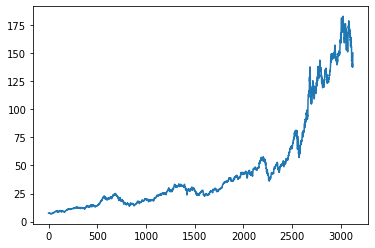

In [8]:
plt.plot(df.Open)

In [10]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3121,141.789993,138.339996,138.429993,140.520004,92482700.0
3122,144.339996,137.139999,137.389999,143.779999,90601500.0
3123,149.679993,145.259995,145.389999,149.639999,90978500.0
3124,150.660004,146.839996,149.070007,148.839996,103718400.0


In [11]:
ma100=df.Open.rolling(100).mean()

In [12]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3121    164.5020
3122    164.0976
3123    163.7252
3124    163.4198
3125    163.1918
Name: Open, Length: 3126, dtype: float64

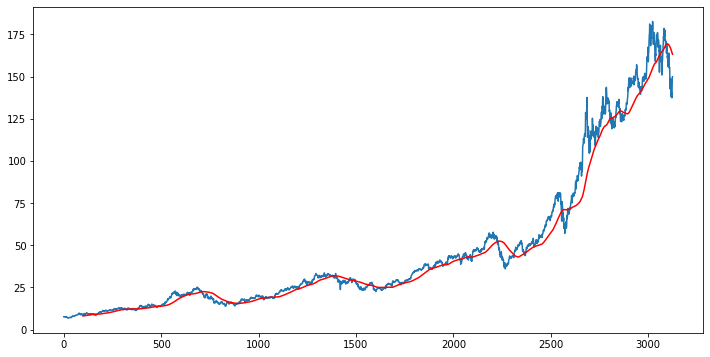

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Open)
plt.plot(ma100,'r')

In [15]:
ma200=df.Open.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3121    159.43025
3122    159.38695
3123    159.38295
3124    159.38345
3125    159.39025
Name: Open, Length: 3126, dtype: float64

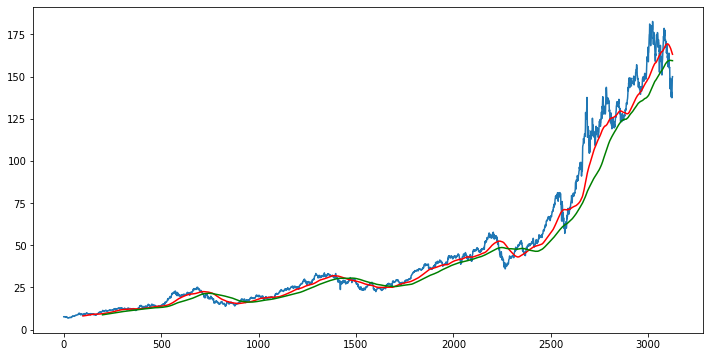

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Open)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [17]:
df.shape

(3126, 5)

In [18]:
# SPILITING DATA INTO TRAINING AND TESTING

data_train = pd.DataFrame(df['Open'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Open'][int(len(df)*0.70): int(len(df))])

print(data_train.shape)
print(data_test.shape)

(2188, 1)
(938, 1)


In [19]:
data_train.head()

,Open
0,7.611786
1,7.622500
2,7.664286
3,7.656429
4,7.562500


In [20]:
data_test.head()

,Open
2188,54.502499
2189,56.235001
2190,55.880001
2191,56.437500
2192,55.537498


In [21]:
!pip install Sklearn

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_train_array= scaler.fit_transform(data_train)

data_train_array

array([[0.01471756],
       [0.01493024],
       [0.01575971],
       ...,
       [0.98630326],
       [0.96456727],
       [0.96010091]])

In [24]:
data_train_array.shape

(2188, 1)

In [25]:
x_train=[]
y_train=[]


for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i, 0])
    
x_train, y_train =np.array(x_train), np.array(y_train)

In [26]:
x_train.shape

(2088, 100, 1)

In [27]:
!pip install keras

In [28]:
!pip install tensorflow

In [29]:
# ML Model
 
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [30]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences = True,
              input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
          
          
model.add(LSTM(units = 60, activation= 'relu', return_sequences = True))
model.add(Dropout(0.3))
          
          
          
model.add(LSTM(units = 80, activation= 'relu', return_sequences = True))
model.add(Dropout(0.4))
                    
          
          
model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(0.5))
          
          
model.add(Dense(units = 1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
66/66 [==============================] - 13s 137ms/step - loss: 0.0324
Epoch 2/50
66/66 [==============================] - 9s 134ms/step - loss: 0.0052
Epoch 3/50
66/66 [==============================] - 9s 135ms/step - loss: 0.0051
Epoch 4/50
66/66 [==============================] - 9s 133ms/step - loss: 0.0045
Epoch 5/50
66/66 [==============================] - 9s 129ms/step - loss: 0.0043
Epoch 6/50
66/66 [==============================] - 8s 128ms/step - loss: 0.0044
Epoch 7/50
66/66 [==============================] - 9s 130ms/step - loss: 0.0040
Epoch 8/50
66/66 [==============================] - 9s 132ms/step - loss: 0.0039
Epoch 9/50
66/66 [==============================] - 9s 129ms/step - loss: 0.0036
Epoch 10/50
66/66 [==============================] - 9s 130ms/step - loss: 0.0034
Epoch 11/50
66/66 [==============================] - 9s 134ms/step - loss: 0.0032
Epoch 12/50
66/66 [==============================] - 9s 129ms/step - loss: 0.0028
Epoch 13/50
66/66 [=====

In [38]:
model.save('keras_modelOpening.h5')

In [39]:
data_test.head()

,Open
2188,54.502499
2189,56.235001
2190,55.880001
2191,56.437500
2192,55.537498


In [40]:
past_100_days = data_train.tail(100)

In [41]:
final_df = past_100_days.append(data_test, ignore_index=True)

In [42]:
final_df.head()

,Open
0,43.439999
1,42.650002
2,41.707500
3,41.417500
4,40.654999


In [43]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05077232],
       [0.04538481],
       [0.03895728],
       ...,
       [0.74603605],
       [0.77113243],
       [0.77679265]])

In [44]:
input_data.shape

(1038, 1)

In [45]:
x_test=[]
y_test=[]


for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [46]:
x_test, y_test =np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(938, 100, 1)
(938,)


In [47]:
# PREDICTIONS

y_predicted= model.predict(x_test)

30/30 [==============================] - 2s 55ms/step


In [48]:
y_predicted.shape

(938, 1)

In [49]:
y_test

array([1.26214744e-01, 1.38029808e-01, 1.35608834e-01, 1.39410783e-01,
       1.33273085e-01, 1.25839661e-01, 1.27050161e-01, 1.30016720e-01,
       1.30937361e-01, 1.24185919e-01, 1.29181303e-01, 1.31312444e-01,
       1.36120313e-01, 1.37774055e-01, 1.43161588e-01, 1.41968154e-01,
       1.46741917e-01, 1.47986496e-01, 1.43178654e-01, 1.33375401e-01,
       1.35813415e-01, 1.38916370e-01, 1.20264612e-01, 1.30323591e-01,
       1.31585237e-01, 1.27783261e-01, 1.33528837e-01, 1.25959017e-01,
       1.26299995e-01, 1.29249488e-01, 1.22498045e-01, 1.34040316e-01,
       1.25703290e-01, 1.22617375e-01, 1.28226555e-01, 1.14519036e-01,
       1.24288209e-01, 1.27987868e-01, 1.11791190e-01, 1.02840394e-01,
       9.87826919e-02, 1.05687597e-01, 1.12524290e-01, 1.04971536e-01,
       9.38043476e-02, 8.12391435e-02, 8.51092784e-02, 7.57152144e-02,
       7.93125829e-02, 7.84601262e-02, 5.86319739e-02, 6.09506573e-02,
       5.27841331e-02, 5.15906989e-02, 4.69362663e-02, 5.58359169e-02,
      

In [50]:
y_predicted

array([[0.1655795 ],
       [0.16716486],
       [0.16849968],
       [0.1696034 ],
       [0.17053288],
       [0.17130652],
       [0.17188777],
       [0.1722505 ],
       [0.1724131 ],
       [0.17242253],
       [0.17228737],
       [0.17204678],
       [0.17176083],
       [0.17151314],
       [0.17138018],
       [0.17144153],
       [0.17173219],
       [0.17227781],
       [0.17307964],
       [0.17408475],
       [0.17514904],
       [0.17614774],
       [0.17701516],
       [0.17759985],
       [0.17785212],
       [0.1778    ],
       [0.17748234],
       [0.17698996],
       [0.17636594],
       [0.175647  ],
       [0.17488961],
       [0.17410165],
       [0.1733576 ],
       [0.17267641],
       [0.17203511],
       [0.17144395],
       [0.17083254],
       [0.17019531],
       [0.16957723],
       [0.1689241 ],
       [0.16812296],
       [0.16707644],
       [0.16579035],
       [0.16436283],
       [0.16286537],
       [0.16129565],
       [0.15958464],
       [0.157

In [51]:
scaler.scale_

array([0.00681965])

In [52]:
scale_factor =1/0.2099517
y_predicted =y_predicted* scale_factor
y_test = y_test * scale_factor

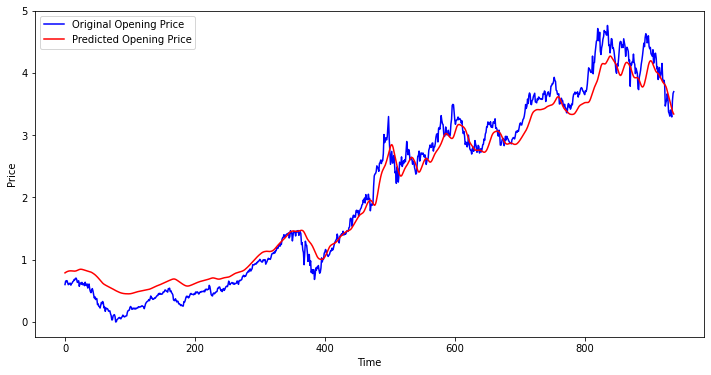

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Opening Price')
plt.plot(y_predicted, 'r', label= 'Predicted Opening Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()